### Part I:Introduction to Larange Multiplier
- visualization for the constrained optimization problem
- numerical solution for the constrained optimization problem

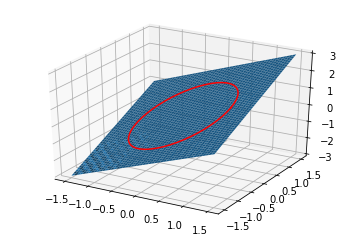

In [16]:
import numpy as np

x = np.linspace(-1.5, 1.5)

[X, Y] = np.meshgrid(x, x)

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, X + Y)

theta = np.linspace(0,2*np.pi);
R = 1.0
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)

ax.plot(x1, y1, x1 + y1, 'r-')
plt.show()

# plt.savefig('lagrange-1.png')

In [17]:
def func(x, sign=1.0):
    """ Objective function """
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

def func_deriv(x, sign=1.0):
    """ Derivative of objective function """
    dfdx0 = sign*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = sign*(2*x[0] - 4*x[1])
    return np.array([ dfdx0, dfdx1 ])

cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - 1]),
         'jac' : lambda x: np.array([0.0, 1.0])})

from scipy.optimize import minimize

res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,
               method='SLSQP', options={'disp': True})
print(res.x)

res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,\
               constraints=cons, method='SLSQP', options={'disp': True})
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.0
            Iterations: 4
            Function evaluations: 5
            Gradient evaluations: 4
[ 2.  1.]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.0000001831052137
            Iterations: 9
            Function evaluations: 14
            Gradient evaluations: 9
[ 1.00000009  1.        ]


### Part II:熱力學第二定律
- 溫度不可能自動從低流到高
- 熱力學系統的亂度越來越大
- 這兩種表述等價
- 熱力學函數(domain: phase space, we call it "state function" either.)
    - 熱非熱力學函數 而能量是
    - heat is a relative concept($\delta$Q), it is independent to the path
    
    $\oint \! \dfrac{\delta Q}{T} \, \mathrm{d} t \leq 0 $ (Clausius theorem)
- Macrostate(such as heat) vs Microstate(state)
    - Example. a system with binary states
- Additive(extensive) vs intensive
    - Example. Entropy is extensive
- State Function define as S($\Omega$)
    - S($\Omega$1$\Omega$2)=S($\Omega$1)S($\Omega$2)
    - S = $k_{B}$ln$\Omega$
    - S = $-k_{B} \sum p_i ln(p_i)$
    - Constraint: $\sum(p_i)=1$
    - $\rightarrow$ use Lagrangian to prove the above formulas are equivalent
- Micro Canonical Ensemble
    - fixed temperature $\rightarrow$ E = $E$ (E) = $\sum E_i p_i$
    - $\rightarrow$ minimize the free energy equilibrium cononical ensemble
    - $\rightarrow$ Partition and Boltzman distribution


### Part III: Speech Note

- Universality of the Random-Cluster Model (Li Jhih-Huang李志華)
    - interaction between particles (micro view)
    - physical parameters that vary (macro view) $\rightarrow$ phase transition
    - Universality Behavior: independent of the molecule and the lattice(晶格) (model setting here: rnadom-cluster model)

    - Graph:
        - V,E,$p$
        - Bernoulli Percolation(滲透) 
          - Here,$p$ :擦掉/不擦的機率(i.e. open/closed, configuration: $\omega$ belongs to $\{0,1\}^E$)
          - Bernoulli PErcolation measure
        - Rnadom-cluster model : 
          - q: cluster rate 
          - k($\omega$): # of connective subgraph
          - $P_RC (\omega) \propto P_perco q^{k(\omega)} \propto \Pi_{e,\omega_e} p_e \Pi(1-p_e)q^{k(\omega)}$
              - q=1, Bernoulli Percolation model
              - $Z^2 $, q $\geq$ 1 ,0 $\leq$ p $\leq$ 1 
              - property of connectiveness (visualization:p=0.55 幾乎佔滿空間)
              - $p_c$ while $q=1,p_c=0.5$
                  - $<p_c$, no infinite cluster(connective compoment)
                  - $>p_c$, infinite cluster
              - Continuous/discontinuous phase transition while q>=1
                  - Mixing property(equivalent to continuity)
                      - Relation with infinite-far position
                  - Result: 1 $\leq$ q $\leq$ 4 continuous q>4 discontinuous
         - Isoradial graph
             - A graph such that all the faces are circumscribed in circles of the same radius(所有點都在外接圓上)
             - Rhombus tiling(菱形覆蓋) easy to deal with(edge等長)
                 - Example : 六角/三角/方型網格
             - Discrete complex variate analysis
             - Theorem: There exist $f_q: [0,pi] \rightarrow [0,1]$ such that the parameters ($p_e = f_q(\theta_e)$),e $\in$ E are critical
                 - P_theta decreasing as theata increase
                 - Critical? 存在無限大連通元件
                 - Continuous for 1 $\leq$ q $\leq$ 4 discontinuous for q>4 (same but more genererlized conclusion)
         - How to choose $f_q$: star-triangle transformation
             - Triangle -> 六角 -> rectangle (rearrange of 菱形,3D cube append)
             - Small detour: series, Parallel Star-Triangle(電路拓樸)
                 - RC model: 化成單電阻電路
             - $f_q$ satisfies properties above : especially (probability of) connectiveness